## Loading Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/Users/macbookpro/Desktop/wdbc.data',
                  names=['ID_Number', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area',
                        'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
                        'radius_2', 'texture_2', 'perimeter_2', 'area_2', 'smoothness_2', 'compactness_2',
                        'concavity_2', 'concave_points_2', 'symmetry_2', 'fractal_dimension_2',
                        'radius_3', 'texture_3', 'perimeter_3', 'area_3', 'smoothness_3', 'compactness_3',
                        'concavity_3', 'concave_points_3', 'symmetry_3', 'fractal_dimension_3'])
print(f'Dataset have {len(data)} rows')
data = data.dropna() #We make sure there aren't missing data
print(f'Working with {len(data)} rows')
data.head()

Dataset have 569 rows
Working with 569 rows


,ID_Number,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- We do not have missing values, as mentionned in the website.

## Understanding and visualizing Data

In [4]:
import matplotlib.pyplot as plt

#### Unbalanced dataset ?

- We check this in case we have a very unbalanced dataset

B    357
M    212
Name: Diagnosis, dtype: int64


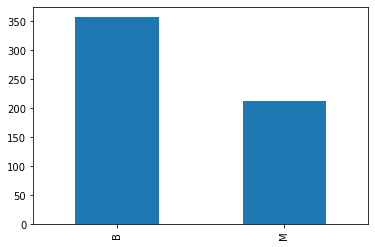

In [5]:
data['Diagnosis'].value_counts().plot(kind = 'bar')
print(data['Diagnosis'].value_counts())

- Our dataset isn't unbalanced. Thus, We will use accuracy and auc score as metrics.

#### Correlation 

- I'm plotting the correlation Matrix

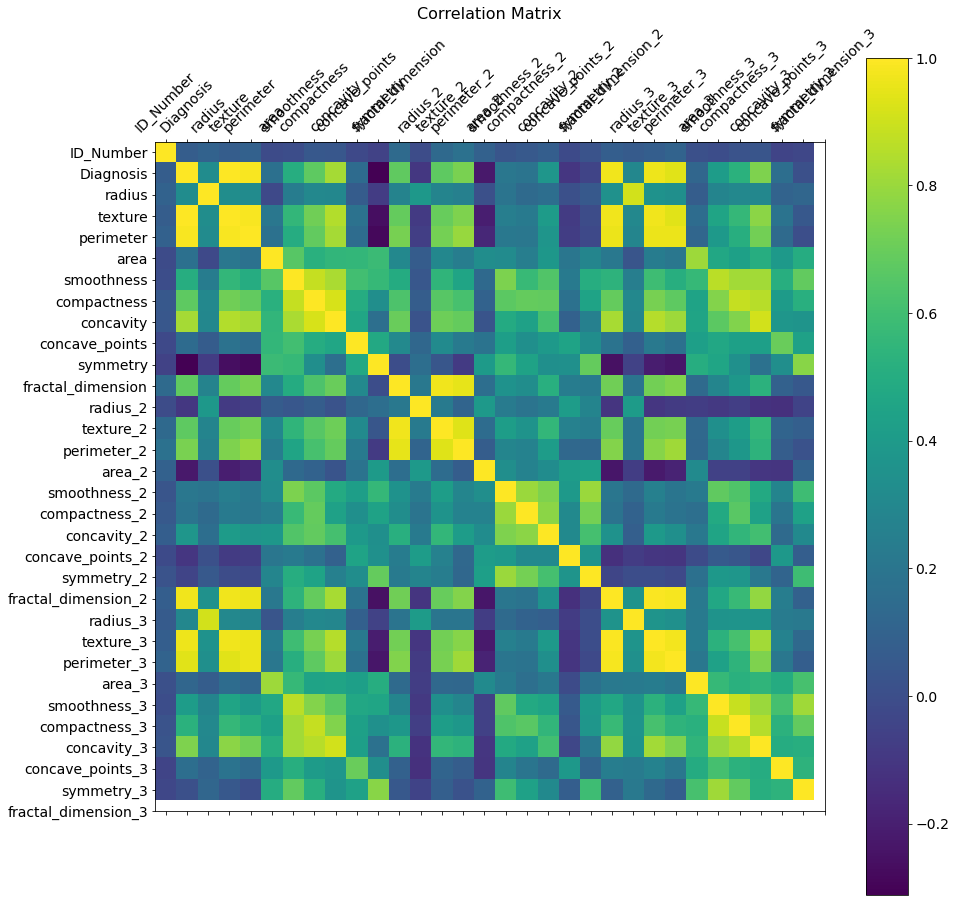

In [6]:
f = plt.figure(figsize=(15, 15))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

- It seems like there is relationship between some features (Texture and perimeter or also radius and fractal dimension).
- Considering this, I'll use a method for dimensionality reduction, such as Principal Component Analysis. 

## Preparing Data for training

- We prepare our dataset for a classifier

In [7]:
#A function to convert the diagnosis to a binary value since the labels shouldn't be strings

def attribution(str):
    if str == 'M':
        return 0
    elif str == 'B':
        return 1

In [8]:
X = data.iloc[:, 2:]
y = data['Diagnosis'].apply(attribution)

X.head()
#I'm also removing Identifier from features, since it's not supposed to be related to the diagnosis. 

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,...,radius_3,texture_3,perimeter_3,area_3,smoothness_3,compactness_3,concavity_3,concave_points_3,symmetry_3,fractal_dimension_3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Now, we split our data to a train part and a test part for training our algorithm

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

- Now, I'll perform a PCA for dimensional reduction as mentioned before. I'll also scale the features before this,
  since the PCA is sensitive to the variance and the features aren't in the same scale

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [11]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled[:1] 

array([[0.20251787, 0.3466351 , 0.20682745, 0.10629905, 0.29944607,
        0.30280351, 0.21729147, 0.2777336 , 0.83152763, 0.26053075,
        0.13583198, 0.34113069, 0.09928048, 0.05206968, 0.47683312,
        0.603599  , 0.26658986, 0.88795518, 0.37003996, 0.25595943,
        0.1398079 , 0.27478678, 0.13875193, 0.06203303, 0.20887539,
        0.15233189, 0.12348243, 0.32006873, 0.27399961, 0.09871442]])

- We scaled the data to the range between 0 and 1 before using PCA

- For PCA, we want the explained variance to be between 95–99%. This is an alternative for choosing the optimal n_components in the PCA.

In [12]:
pca = PCA(n_components = 0.95)
pca.fit(X_train_scaled)

X_train_reduced = pca.transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

## Classification Model

- I will find the best classifier between : Logistic Regression, SVM (SVC implementation) and Random Forest. 
- I'm defying a dictionnary per classifier and a list of different values for important parameters for each classifier. The idea is to find the best classifier with the optimal parameters, the ones who give the best accuracy and the best auc_score

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [18]:
dico_log_reg_accuracy = {}
dico_log_reg_auc_score = {}
list_C_log_Reg = np.linspace(0.1, 2, 20, endpoint = True)

dico_SVC_accuracy = {}
dico_SVC_auc = {}
list_gamma = np.linspace(0.001, 0.1, 100, endpoint = True)
list_C_SVC = np.linspace(0.1, 1.5, 15, endpoint = True)

dico_random_forest_accuracy = {}
dico_random_forest_auc_score = {}
list_max_depth_rf = np.linspace(10, 200, 20, endpoint = True)

In [19]:
for C in tqdm(list_C_log_Reg) : 
    clf = LogisticRegression(C = C, random_state=0).fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    dico_log_reg_accuracy[C] = accuracy_score(y_test, y_pred)
    dico_log_reg_auc_score[C] = roc_auc_score(y_test, y_pred)

for C in tqdm(list_C_SVC):
    for gamma in list_gamma:
        SVCmodel = SVC(C = C, gamma = gamma).fit(X_train_reduced, y_train)
        y_pred = SVCmodel.predict(X_test_reduced)
        dico_SVC_accuracy[C, gamma] = accuracy_score(y_test, y_pred)
        dico_SVC_auc[C, gamma] = roc_auc_score(y_test, y_pred)

for max_depth in tqdm(list_max_depth_rf):
    random_forest = RandomForestClassifier(max_depth = max_depth, random_state=0)
    random_forest.fit(X_train_reduced, y_train)
    y_pred = clf.predict(X_test_reduced)
    dico_random_forest_accuracy[max_depth] = accuracy_score(y_test, y_pred)
    dico_random_forest_auc_score[max_depth] = roc_auc_score(y_test, y_pred)    

100%|██████████| 20/20 [00:04<00:00,  4.08it/s]


In [20]:
print(f'Best accuracy for logistic Regression : {max(dico_log_reg_accuracy.values())}')
print(f'Best accuracy for SVC : {max(dico_SVC_accuracy.values())}')
print(f'Best accuracy for Random Forest : {max(dico_random_forest_accuracy.values())} \n')

print(f'Best AUC for Logistic Regression : {round(max(dico_log_reg_auc_score.values()), 2)}')
print(f'Best AUC for SVC : {round(max(dico_SVC_auc.values()), 2)}')
print(f'Best AUC for Random Forest {round(max(dico_random_forest_auc_score.values()), 2)}')

Best accuracy for logistic Regression : 0.956140350877193
Best accuracy for SVC : 0.956140350877193
Best accuracy for Random Forest : 0.9122807017543859 

Best AUC for Logistic Regression : 0.96
Best AUC for SVC : 0.96
Best AUC for Random Forest 0.92


- We notice that the SVC allows the best accuracy (0,991) and an AUC of 0.99. 
- I retrieve one key containing the parameters allowing this score

In [21]:
[key for key in dico_SVC_accuracy.keys() if dico_SVC_accuracy[key] == max(dico_SVC_accuracy.values()) ][0]

(1.2, 0.029)

In [25]:
[key for key in dico_log_reg_accuracy.keys() if dico_log_reg_accuracy[key] == max(dico_log_reg_accuracy.values())][0]

0.1

We choose C = 0.4 and gamma = 0.079

### We evaluate our model thanks to a cross-validation 

In [25]:
from sklearn.model_selection import cross_val_score

Classifier = SVC(C = 0.4, gamma = 0.079)
mean_accuracy = cross_val_score(Classifier, X_train_reduced, y_train, cv = 5, scoring = 'accuracy').mean()
mean_auc_score = cross_val_score(Classifier, X_train_reduced, y_train, cv = 5, scoring = 'roc_auc').mean()
print(f' Accuracy = {mean_accuracy}')
print(f' AUC_Score = {mean_auc_score}')

 Accuracy = 0.9406593406593406
 AUC_Score = 0.9868078810471557


- The mean of 5 folds cross validation accuracy is : 94.9% with an AUC of 0.988

### More metrics for our classifier

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['M', 'B']))

              precision    recall  f1-score   support

           M       0.83      0.98      0.90        46
           B       0.98      0.87      0.92        68

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



- The classifier shows great result, in particular with the detection of all malignant cells and a F1-score of 0.99

## Going Further

- With more time, I could try to train more classifiers (Naive Bayes, Adaboost ... etc)
- I may also try other parameters with a gridsearch